In [1]:
df <- read.csv("6681025bd39643e09f36d096c858ab2b.csv", header=T)
df

row.ID,row.m.z,row.retention.time,X168B_sub_Cent.Peak.area,X168BP01_Cent.Peak.area,X168BP02_Cent.Peak.area,X168BP03_Cent.Peak.area,X168BP04_Cent.Peak.area,X168BP05_Cent.Peak.area,X168BP06_Cent.Peak.area,⋯,QC10_Cent.Peak.area,QC11_1_Cent.Peak.area,QC2_Cent.Peak.area,QC3_Cent.Peak.area,QC4_Cent.Peak.area,QC5_Cent.Peak.area,QC6_Cent.Peak.area,QC7_Cent.Peak.area,QC8_Cent.Peak.area,QC9_Cent.Peak.area
<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,84.95937,0.674,7125,4260,2506,1561,981,1565,4899,⋯,311,285,362,412,346,321,321,280,308,307
2,88.07542,1.383,0,0,0,0,281,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,91.05432,2.076,109,118,130,113,52,22,108,⋯,0,0,0,0,0,0,0,0,0,0
4,92.04958,2.959,1003,44638,456,9183,810,0,718,⋯,0,0,0,0,0,0,0,0,0,0
5,97.06486,2.866,0,0,0,0,0,0,3923,⋯,0,0,0,0,0,0,0,0,0,0
6,100.07566,12.285,18657,49411,46796,44717,48394,49087,51258,⋯,47934,36459,53479,65067,47303,61169,39260,48806,46185,49903
7,100.07581,13.016,29945,86084,83083,81954,75191,83677,87842,⋯,74300,67653,89521,85339,84968,73981,78555,70816,65854,75062
8,100.07584,12.637,30650,87654,79544,79725,78729,73331,89226,⋯,70054,62409,88319,86098,75156,81036,71516,74229,71543,71509
9,100.07598,12.122,15812,44229,39247,39287,40435,40652,40790,⋯,34284,34290,47698,38716,47303,39790,38441,42114,36656,43402


In [2]:
#install.packages("stringr")
library("stringr")
library(ggplot2)
library(dplyr)

Warning message:
"package 'ggplot2' was built under R version 4.4.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
colnames(df) <- str_replace_all(colnames(df), '.Peak.area','')
colnames(df) <- str_replace_all(colnames(df), '_Cent','')

In [4]:
replace_less_than_100 <- function(x) {
  ifelse(x < 100, 0, x)
}
# Apply the function to all columns except the first three
df[, -c(1:3)] <- apply(df[, -c(1:3)], 2, replace_less_than_100)

# View the modified dataframe
df

row.ID,row.m.z,row.retention.time,X168B_sub,X168BP01,X168BP02,X168BP03,X168BP04,X168BP05,X168BP06,⋯,QC10,QC11_1,QC2,QC3,QC4,QC5,QC6,QC7,QC8,QC9
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,84.95937,0.674,7125,4260,2506,1561,981,1565,4899,⋯,311,285,362,412,346,321,321,280,308,307
2,88.07542,1.383,0,0,0,0,281,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,91.05432,2.076,109,118,130,113,0,0,108,⋯,0,0,0,0,0,0,0,0,0,0
4,92.04958,2.959,1003,44638,456,9183,810,0,718,⋯,0,0,0,0,0,0,0,0,0,0
5,97.06486,2.866,0,0,0,0,0,0,3923,⋯,0,0,0,0,0,0,0,0,0,0
6,100.07566,12.285,18657,49411,46796,44717,48394,49087,51258,⋯,47934,36459,53479,65067,47303,61169,39260,48806,46185,49903
7,100.07581,13.016,29945,86084,83083,81954,75191,83677,87842,⋯,74300,67653,89521,85339,84968,73981,78555,70816,65854,75062
8,100.07584,12.637,30650,87654,79544,79725,78729,73331,89226,⋯,70054,62409,88319,86098,75156,81036,71516,74229,71543,71509
9,100.07598,12.122,15812,44229,39247,39287,40435,40652,40790,⋯,34284,34290,47698,38716,47303,39790,38441,42114,36656,43402


In [5]:
# Giả sử df là dataframe của bạn

# Lấy tên của tất cả các cột
all_columns <- colnames(df)

# Chia thành 3 nhóm dựa trên tên cột
group1_columns <- all_columns[grep("^X168BP\\d{2}$", all_columns)]
group2_columns <- all_columns[grep("^X168BPs\\d{2}$", all_columns)]
group3_columns <- all_columns[grep("^P\\d{2}$", all_columns)]

# Lọc dữ liệu theo nhóm
BP_data <- df[, grepl("^X168BP\\d{2}$", colnames(df))]
BPs_data <- df[, grepl("^X168BPs\\d{2}$", colnames(df))]
P_data <- df[, grepl("^P\\d{2}$", colnames(df))]
X168Bsub_data <- df[, c("row.ID", "X168B_sub")]
#Bsub_data
BP_data

X168BP01,X168BP02,X168BP03,X168BP04,X168BP05,X168BP06,X168BP07,X168BP08,X168BP09,X168BP10,⋯,X168BP77,X168BP81,X168BP82,X168BP83,X168BP84,X168BP85,X168BP86,X168BP87,X168BP88,X168BP89
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4260,2506,1561,981,1565,4899,2315,3267,4204,4608,⋯,666,6334,2690,3443,10233,5104,2188,3913,3972,2685
0,0,0,281,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
118,130,113,0,0,108,245,120,0,144,⋯,0,0,0,0,0,0,0,0,0,0
44638,456,9183,810,0,718,3308,2611,32448,25934,⋯,1510,0,1203,327,763,235,29696,479,576,574
0,0,0,0,0,3923,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
49411,46796,44717,48394,49087,51258,50637,53560,45794,49480,⋯,48239,44919,46758,53730,50391,41232,45367,44503,49179,47991
86084,83083,81954,75191,83677,87842,84510,77791,82562,79644,⋯,74182,80535,76376,78017,79711,82309,69899,69612,79042,81187
87654,79544,79725,78729,73331,89226,86703,89275,84763,87294,⋯,70141,75499,74327,76284,66840,74514,76485,72463,76111,73483
44229,39247,39287,40435,40652,40790,41412,44638,37988,37492,⋯,40253,40445,39347,41991,43428,40110,37537,37577,41252,39753


In [6]:
colnames(X168Bsub_data)[colnames(X168Bsub_data) == "row.ID"] <- "ID"

In [7]:
BP_data <- cbind(df[1], BP_data)
BPs_data <- cbind(df[1], BPs_data)
P_data <- cbind(df[1], P_data)
#BPs_data

In [8]:
# Load the dplyr package
library(dplyr)

# Calculate the average for each ID
mean_BP_data <- rowMeans(BP_data[, -1])  # Exclude the first column (ID)
new_BP_data <- data.frame(ID = unique(df$row.ID), Mean = tapply(mean_BP_data, df$row.ID, mean))

mean_BPs_data <- rowMeans(BPs_data[, -1]) 
new_BPs_data <- data.frame(ID = unique(df$row.ID), Mean = tapply(mean_BPs_data, df$row.ID, mean))

mean_P_data <- rowMeans(P_data[, -1]) 
new_P_data <- data.frame(ID = unique(df$row.ID), P = tapply(mean_P_data, df$row.ID, mean))
#new_P_data
#new_BP_data
#new_BPs_data

In [9]:
#combine coculture and axenic
merged_cocult <- merge(new_BP_data, new_BPs_data, by = "ID")
merged_axenic <- merge(new_P_data, X168Bsub_data, by = "ID")

# Calculate the mean for each row (by ID) in merged_cocult
mean_cocult_id <- rowMeans(merged_cocult[, -1])
mean_cocult <- data.frame(ID = merged_cocult$ID, Cocult = tapply(mean_cocult_id, merged_cocult$ID, mean))

# Calculate the total for each row (by ID) in merged_axenic
total_axenic_id <- rowSums(merged_axenic[, -1])
total_axenic <- data.frame(ID = merged_axenic$ID, Total = tapply(total_axenic_id, merged_axenic$ID, sum))

# View the results
mean_cocult
total_axenic

,ID,Cocult
,<int>,<dbl>
1,1,2342.470930
2,2,131.343023
3,3,32.598837
4,4,3392.255814
5,5,499.668605
6,6,41900.087209
7,7,72030.662791
8,8,69169.982558
9,9,36199.220930


,ID,Total
,<int>,<dbl>
1,1,7447.95349
2,2,60.95349
3,3,572.83721
4,4,1062.15116
5,5,823.79070
6,6,28682.10465
7,7,42770.95349
8,8,42765.51163
9,9,24409.05814


###


FOLD_CHANGES_WHOLE DATA

###

In [10]:
replace_less_than_1 <- function(x) {
  ifelse(x < 1, 1, x)
}
# Apply the function to all columns except the first three
mean_cocult[-1] <- apply(mean_cocult[-1], 2, replace_less_than_1)
total_axenic[-1] <- apply(total_axenic[-1], 2, replace_less_than_1)

In [11]:
# Merge the data frames by ID
merged_cocult_axenic <- merge(mean_cocult, total_axenic, by = "ID", suffixes = c("_mean_cocult", "_total_axenic"))

# Perform the division for each corresponding column
result_cocult_axenic <- merged_cocult_axenic %>%
  mutate(
    Fold_changed = Cocult / Total,
  ) %>%
  select(ID,Fold_changed)

result_cocult_axenic


ID,Fold_changed
<int>,"<dbl[,1]>"
1,0.31451202
2,2.15480733
3,0.05690768
4,3.19375992
5,0.60654801
6,1.46084423
7,1.68410234
8,1.61742441
9,1.48302408


In [12]:
write.csv(result_cocult_axenic, file = "result_cocult_axenic_having bacteria.csv", row.names = TRUE)

In [13]:
log_fold_changes <- log10(result_cocult_axenic[-1])
#log_fold_changes

In [14]:
log_fold_changes  <- cbind(df[1], log_fold_changes )
#log_fold_changes

In [15]:
write.csv(log_fold_changes, file = "log_fold_changes_Penicillium and bacteria_240509.csv", row.names = TRUE)

# 
DOTCHART TEST

BPs / Total  #Penicillium colonies/Axenic

BP1 / Total  #Confronting Zone/Axenic

#

In [16]:
replace_less_than_1 <- function(x) {
  ifelse(x < 1, 1, x)
}
# Apply the function to all columns except the first three
new_BP_data[-1] <- apply(new_BP_data[-1], 2, replace_less_than_1)
new_BPs_data[-1] <- apply(new_BPs_data[-1], 2, replace_less_than_1)

In [17]:
# Merge the data frames by ID
merged_BP1_axenic <- merge(new_BP_data, total_axenic, by = "ID", suffixes = c("_new_BP_data", "_total_axenic"))
merged_BPs_axenic <- merge(new_BPs_data, total_axenic, by = "ID", suffixes = c("_new_BPs_data", "_total_axenic"))

# Perform the division for each corresponding column
result_BP1_axenic <- merged_BP1_axenic %>%
  mutate(
    Fold_changed = Mean / Total,
  ) %>%
  select(ID,Fold_changed)

result_BPs_axenic <- merged_BPs_axenic %>%
  mutate(
    Fold_changed = Mean / Total,
  ) %>%
  select(ID,Fold_changed)

result_BP1_axenic
result_BPs_axenic

ID,Fold_changed
<int>,"<dbl[,1]>"
1,0.423166033
2,3.083937428
3,0.098794251
4,5.844523510
5,0.631115377
6,1.601978950
7,1.815760370
8,1.789199295
9,1.587265783


ID,Fold_changed
<int>,"<dbl[,1]>"
1,0.20585802
2,1.22567722
3,0.01502111
4,0.54299633
5,0.58198063
6,1.31970952
7,1.55244431
8,1.44564953
9,1.37878237


In [18]:
count_greater_than_1.5 <- result_BP1_axenic %>%
  filter(Fold_changed > 1.5) %>%
  nrow()

count_between_0.5_and_1.5 <- result_BP1_axenic %>%
  filter(Fold_changed >= 0.5 & Fold_changed <= 1.5) %>%
  nrow()

count_less_than_0.5 <- result_BP1_axenic %>%
  filter(Fold_changed < 0.5) %>%
  nrow()

count_nan <- result_BP1_axenic %>%
  filter(is.nan(Fold_changed)) %>%
  nrow()

count_inf <- result_BP1_axenic %>%
  filter(is.infinite(Fold_changed)) %>%
  nrow()

# View the results
print(paste("Count greater than 1.5:", count_greater_than_1.5))
print(paste("Count between 0.5 and 1.5:", count_between_0.5_and_1.5))
print(paste("Count less than 0.5:", count_less_than_0.5))
print(paste("Count of NaN:", count_nan))
print(paste("Count of Inf:", count_inf))

Warning message:
"Using one column matrices in `filter()` was deprecated in dplyr 1.1.0.
ℹ Please use one dimensional logical vectors instead."


[1] "Count greater than 1.5: 3657"
[1] "Count between 0.5 and 1.5: 2246"
[1] "Count less than 0.5: 7071"
[1] "Count of NaN: 0"
[1] "Count of Inf: 0"


In [19]:
count_greater_than_1.5 <- result_BPs_axenic %>%
  filter(Fold_changed > 1.5) %>%
  nrow()

count_between_0.5_and_1.5 <- result_BPs_axenic %>%
  filter(Fold_changed >= 0.5 & Fold_changed <= 1.5) %>%
  nrow()

count_less_than_0.5 <- result_BPs_axenic %>%
  filter(Fold_changed < 0.5) %>%
  nrow()

count_nan <- result_BPs_axenic %>%
  filter(is.nan(Fold_changed)) %>%
  nrow()

count_inf <- result_BPs_axenic %>%
  filter(is.infinite(Fold_changed)) %>%
  nrow()

# View the results
print(paste("Count greater than 1.5:", count_greater_than_1.5))
print(paste("Count between 0.5 and 1.5:", count_between_0.5_and_1.5))
print(paste("Count less than 0.5:", count_less_than_0.5))
print(paste("Count of NaN:", count_nan))
print(paste("Count of Inf:", count_inf))

[1] "Count greater than 1.5: 5404"
[1] "Count between 0.5 and 1.5: 2053"
[1] "Count less than 0.5: 5517"
[1] "Count of NaN: 0"
[1] "Count of Inf: 0"


In [20]:
log_fold_changes_BP1 <- log10(result_BP1_axenic[-1])
log_fold_changes_BPs <- log10(result_BPs_axenic[-1])
log_fold_changes_BP1

Fold_changed
"<dbl[,1]>"
-0.37348920
0.48910556
-1.00526833
0.76674911
-0.19989124
0.20465681
0.25905853
0.25265872
0.20064965


In [21]:
log_fold_changes_BP1 <- cbind(df[1], log_fold_changes_BP1)
log_fold_changes_BPs <- cbind(df[1], log_fold_changes_BPs)

In [22]:
write.csv(log_fold_changes_BP1, file = "log_fold_changes_BP1_Total axeci_240509.csv", row.names = TRUE)
write.csv(log_fold_changes_BPs, file = "log_fold_changes_BPs_Total axeci_240509.csv", row.names = TRUE)

In [23]:
data_BP1 <- read.csv("log_fold_changes_BP1_Total axeci_reformat.csv", header=T)
data_BP1

row.ID,Fold_changed,rank,group
<int>,<dbl>,<int>,<dbl>
4704,-4.224805,1,0.5
4983,-4.125335,2,0.5
11992,-4.025816,3,0.5
12281,-3.981311,4,0.5
4705,-3.967255,5,0.5
1838,-3.920825,6,0.5
12462,-3.874182,7,0.5
6310,-3.816368,8,0.5
12244,-3.791183,9,0.5


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


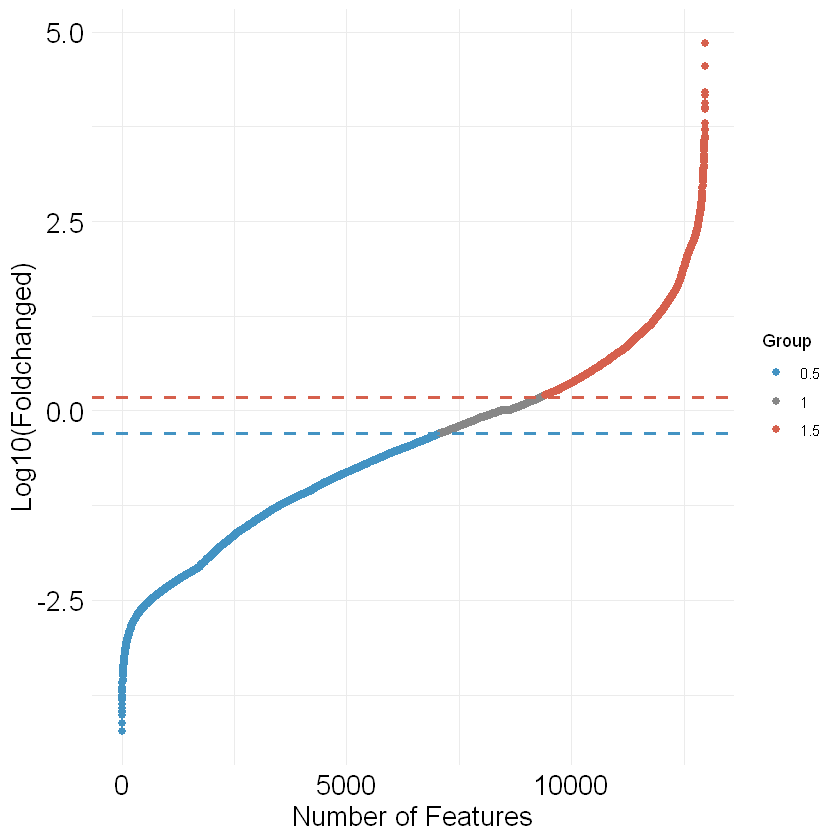

In [24]:
fig1SA_BP1 <- ggplot(data_BP1, aes(x = rank, y = Fold_changed, color = factor(group))) +
  geom_point(size = 2) +
  scale_color_manual(values = c("#4393c3", "#878787", "#d6604d")) + 
  labs(x = "Number of Features", y = "Log10(Foldchanged)", color = "Group") +
  theme_minimal() +
  geom_hline(yintercept = log10(1.5), linetype = "dashed", color = "#d6604d", size = 1.0) + # Đường ngang tại log10(1.5)
  geom_hline(yintercept = log10(0.5), linetype = "dashed", color = "#4393c3", size = 1.0) +   # Đường ngang tại log10(0.5)
  theme(axis.text = element_text(color = "black", size = 16),     # Thay đổi màu và kích thước của nhãn trục
        axis.title = element_text(color = "black", size = 16))    # Thay đổi màu và kích thước của tiêu đề trục

fig1SA_BP1

In [25]:
ggsave("Fig1B_168BP1_0106.tiff", fig1SA_BP1, width=8, height=6)

In [26]:
data_BPs <- read.csv("log_fold_changes_BPs_Total axeci_reformat.csv", header=T)
data_BPs

row.ID,Fold_changed,rank,group
<int>,<dbl>,<int>,<dbl>
1176,-4.386642,1,0.5
4341,-4.006723,2,0.5
537,-3.971409,3,0.5
4704,-3.856107,4,0.5
1838,-3.802245,5,0.5
11230,-3.774062,6,0.5
6210,-3.753820,7,0.5
6559,-3.717656,8,0.5
6865,-3.605746,9,0.5


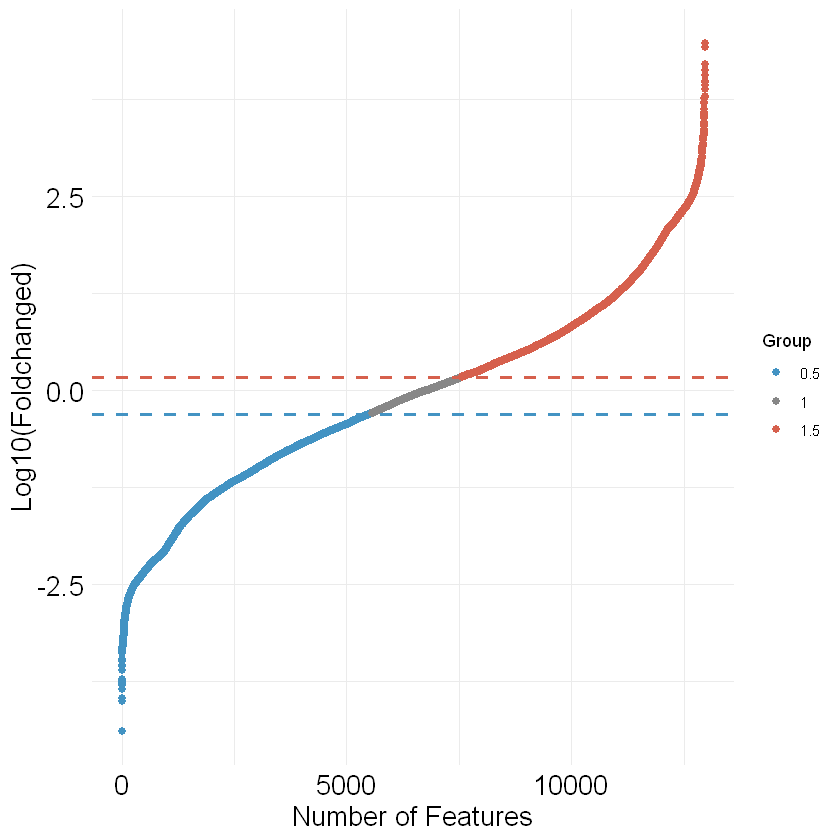

In [27]:
fig1SB_BPs <- ggplot(data_BPs, aes(x = rank, y = Fold_changed, color = factor(group))) +
  geom_point(size = 2) +
  scale_color_manual(values = c("#4393c3", "#878787", "#d6604d")) + 
  labs(x = "Number of Features", y = "Log10(Foldchanged)", color = "Group") +
  theme_minimal() +
  geom_hline(yintercept = log10(1.5), linetype = "dashed", color = "#d6604d", size = 1.0) + # Đường ngang tại log10(1.5)
  geom_hline(yintercept = log10(0.5), linetype = "dashed", color = "#4393c3", size = 1.0) +   # Đường ngang tại log10(0.5)
  theme(axis.text = element_text(color = "black", size = 16),     # Thay đổi màu và kích thước của nhãn trục
        axis.title = element_text(color = "black", size = 16))    # Thay đổi màu và kích thước của tiêu đề trục

fig1SB_BPs

In [28]:
ggsave("Fig1B_168BP1_0106.tiff", fig1SB_BPs, width=8, height=6)